In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [12]:
# Merge the data frames
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Count number of unqiue mouse IDs
combined_data["Mouse ID"].nunique()

249

In [14]:
# Locate mouse ID with duplicate values
dup_values = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_values

array(['g989'], dtype=object)

In [15]:
# Display all duplicate values for that mouse
duplicated_values = combined_data[combined_data["Mouse ID"] == "g989"]
duplicated_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Remove duplicate values
tidy_data = combined_data[combined_data["Mouse ID"].isin(dup_values) == False]
tidy_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Count new number of unique mouse IDs
len(tidy_data["Mouse ID"].unique())

248

In [19]:
# Calculate summary statistics by treatment and display results
means = tidy_data.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
medians = tidy_data.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
variances = tidy_data.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
sds = tidy_data.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
sems = tidy_data.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]
summary_stats = pd.DataFrame({"Mean Tumor Volume": means, 
                              "Median Tumor Volume": medians, 
                              "Tumor Volume Variance": variances, 
                              "Tumor Volume Std. Dev.": sds, 
                              "Tumor Volume Std. Err.": sems})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


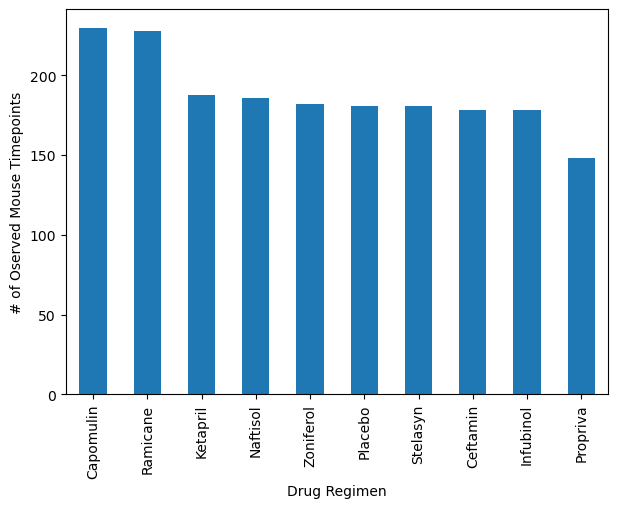

In [20]:
# Create table that counts timepoints by treatment and create bar chart using Pandas
timepoints_drug = tidy_data.groupby("Drug Regimen").count().sort_values("Timepoint", ascending=False).drop(columns=["Mouse ID", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"])
timepoints_drug.plot(kind="bar", figsize=(7,5), legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Oserved Mouse Timepoints")
plt.show()

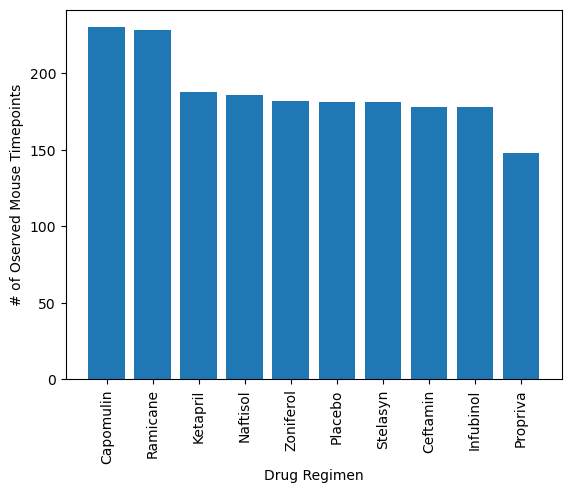

In [21]:
# Create table that counts timepoints by treatment and create bar chart using Pyplot
timepoint_counts = tidy_data.groupby("Drug Regimen").count().reset_index().sort_values("Timepoint", ascending=False)
x_axis = timepoint_counts["Drug Regimen"]
tick_locations = [x for x in x_axis]
plt.bar(x_axis, timepoint_counts["Timepoint"])
plt.xticks(tick_locations, timepoint_counts["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

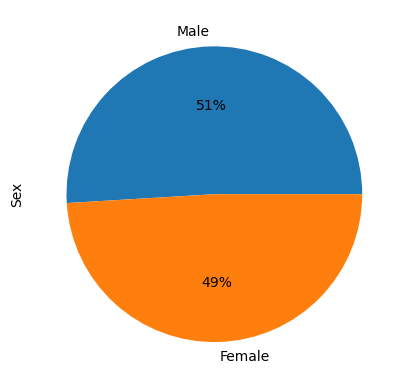

In [22]:
# Create table that counts mice by sex and create pie chart using Pandas
mice_by_sex = tidy_data.groupby("Sex").count().drop(columns=["Drug Regimen", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]).sort_values("Mouse ID", ascending=False)
mice_by_sex.plot(kind="pie", y="Mouse ID", autopct="%1.0f%%", legend=False, ylabel="Sex")
plt.show()

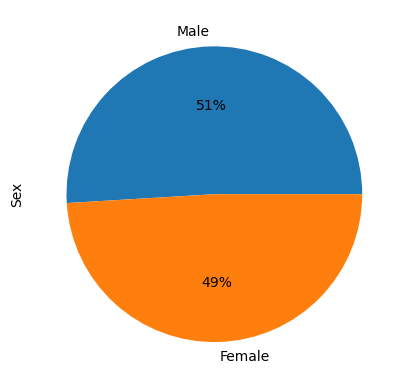

In [23]:
# Create table that counts mice by sex and create pie chart using Pyplot
mice = tidy_data.groupby("Sex").count().reset_index().sort_values("Mouse ID", ascending=False)
counts = mice["Mouse ID"]
labels= mice["Sex"]
plt.pie(counts, labels=labels, autopct="%1.0f%%")
plt.ylabel("Sex")
plt.show()

In [24]:
# Find latest timepoint for each mouse
latest_time = tidy_data.groupby("Mouse ID").max()["Timepoint"].reset_index()
# Merge the latest timepoint dataframe with original dataframe
timepoint_merge = pd.merge(latest_time, tidy_data, on=["Mouse ID", "Timepoint"], how="left")
# Create list of treatments and an empty list to hold tumor volume data
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
# Loop through dataframe, locate the required treatments, append tumor volume data to list, and calculate and display outliers
for treatment in treatments:
    tumor_vol = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    lqr = tumor_vol.quantile(0.25)
    uqr = tumor_vol.quantile(0.75)
    iqr = uqr - lqr
    LB = lqr - (1.5*iqr)
    UB = uqr + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < LB) | (tumor_vol > UB)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


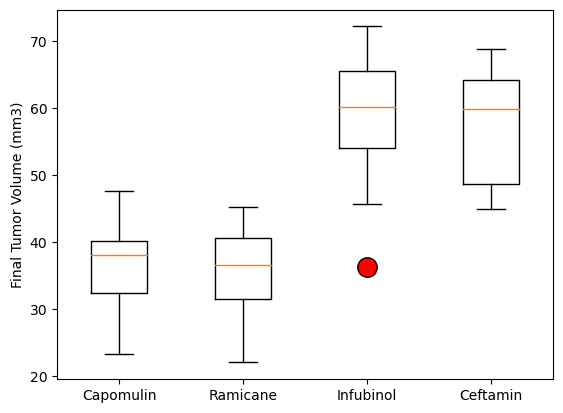

In [46]:
# Create boxplot displaying the four treatments
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops = dict(markerfacecolor="red", markersize=14))
tick_locations = [1, 2, 3, 4]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.xticks(tick_locations, labels) 
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

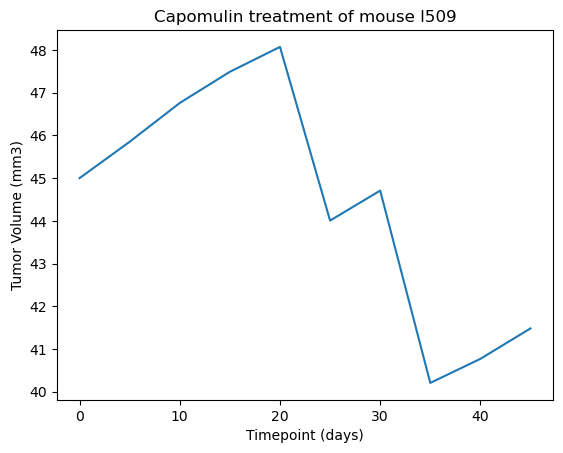

In [26]:
# Locate mouse of interest
mouse_data = tidy_data.loc[tidy_data["Mouse ID"] == "l509"]
# Create line chart of tumor volume by timepoint for that mouse
timepoint = mouse_data["Timepoint"]
volume = mouse_data["Tumor Volume (mm3)"]
plt.plot(timepoint, volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show

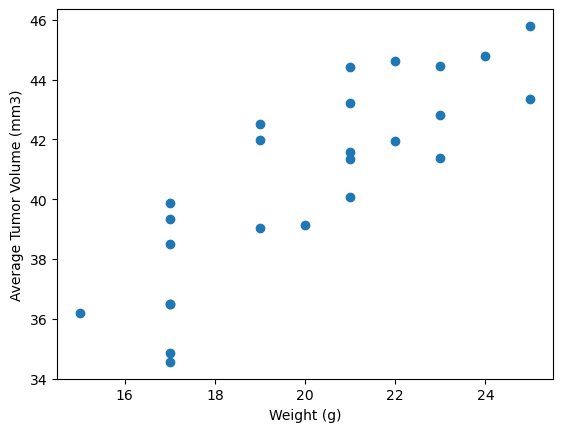

In [27]:
# Filter only Capomulin
capomulin_data = tidy_data.loc[tidy_data["Drug Regimen"] == "Capomulin"]
# Calculate means across all mice in that treatment
capomulin_av_volume = capomulin_data.groupby("Mouse ID").mean(numeric_only=True).reset_index()
# Create scatter plot of average tumor volume by mouse weight
mouse_weight = capomulin_av_volume["Weight (g)"]
av_tumor_volume = capomulin_av_volume["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, av_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [29]:
# Calculate and display Perason's correlation
correlation = st.pearsonr(mouse_weight, av_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


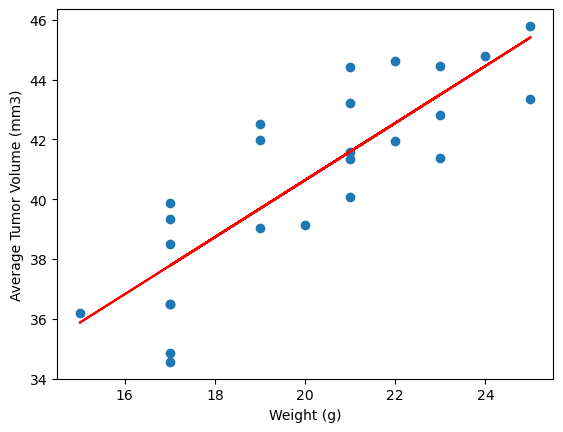

In [31]:
# Create scatter plot, and calculate and display linear regression of average tumour volume by weight
x_values = mouse_weight
y_values = av_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()